<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S5_1_2_Image_Compression_KMeans_Exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression 

Les KMeans sont très utilisés dans un cas précis qui est la compression d’images. Testons un peu cette fonctionnalité.

0. Importez les librairies usuelles 

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

1. Dans Scikit Learn, importez _load_sample_image_ et chargez l’image “china.jpg” ou “flower.jpg”

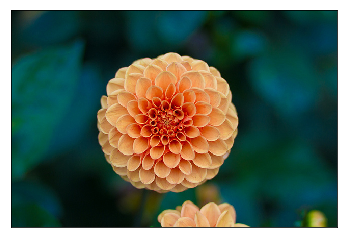

In [3]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

2. Via matplotlib, visualisez votre image

      a. Indice : On utilisera _imshow_

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


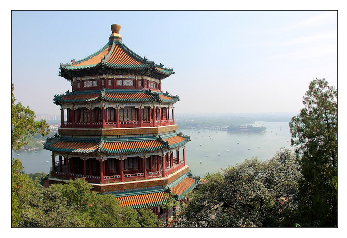

  3. Regardez la taille du dataset, trouver la dimension de notre dataset

In [8]:
flower.imag.shape

(427, 640, 3)

(427, 640, 3)

----> Notre dataset est découpé entre la hauteur du pixel, la largeur du pixel et sa couleur en RGB

4. Divisez votre dataset par 255 puis redimensionnez le en deux dimensions (longueur x largeur, RGB). 

  a. Indice : On pourra utiliser la méthode ```.reshape()```

In [9]:
data = flower / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

5. Nous allons réduire le nombre de couleurs à 16. Pour cela créez un algorithme de KMeans qui prendra 16 clusters.


Au lieu d’utiliser KMeans, vous pouvez utiliser [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html)

In [0]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=16,
                          random_state=0).fit(data)
pred = kmeans.predict(data)                        

6. Pour chacune des couleurs présentes dans votre dataset, réassignez le code couleur du centroïd du cluster correspondant dans une variable qu’on appellera _new_colors_

In [0]:
new_colors = kmeans.cluster_centers_[pred]

7. Redimensionnez new_colors pour qu’elle soit à 3 dimensions

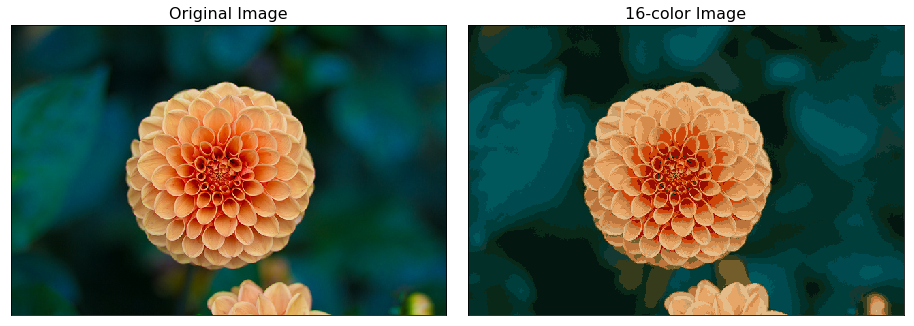

In [14]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

8. Visualisez votre nouvelle image avec votre variable _new_colors_

Text(0.5,1,'16-color Image')

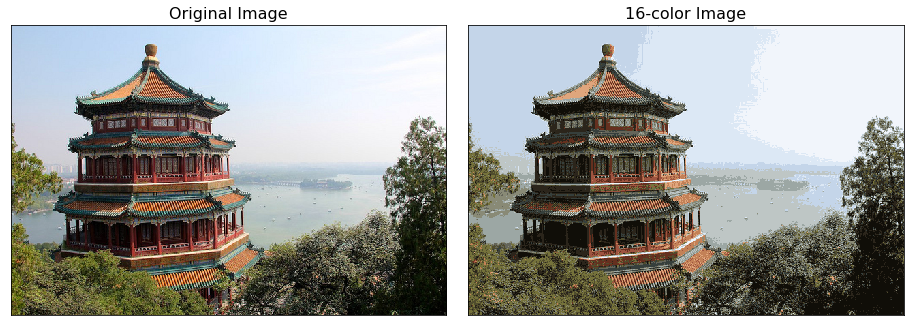